# Facets of Mathematics - Week 8
# Regression Modelling

### Aims

By the end of this notebook you 

* fitted some simple regression models to a data set
* understand how plots work and how to label them nicely

### Topics

* Loading data from stored numpy arrays
* Plotting functions and data points
* Fitting simple linear models
* Fitting quadratic and cubic models
* Creating data
* Randomness in python

### References

**Montgomery, Peck, and Vining:** D. C, Montgomery, E. A. Peck, and G. G. Vining, "Introduction to Linear Regression Analysis", 5th Edition, Wiley Series in Probability and Statistics, 2012

* Simple Linear Regression: Chapter 2, Sections 2.1 and 2.2

---

## Example 1

We firstly load the required packages with their 'standard' abbreviations. The `numpy` package is one of the most popular python packages for mathematical calculations, and is commonly loaded as `np`. The reason for loading it `as np` is merely a convenience as one can save a few letters whenever calling a numpy function, as illustrated in the next few lines. 

`import numpy
x = numpy.ones(12)
x[0:6]= numpy.arange(6)
print(numpy.mean(x))
print(numpy.var(x))`

is rather lengthy, while the following lines are shorter:

`import numpy as np
x = np.ones(12)
x[0:6]= np.arange(6)
print(np.mean(x))
print(np.var(x))`

As we will use a lot of python plots throughout this workshop, we also use an abbreviated version to call the respective functions. `plt` is the standard one for the `matplotlib.pyplot` library. Recall that the '%' in front of matplotlib tells jupyter how to show figures, the '#' allows commenting. 

The setup file contains some lines of code dealing with the presentation of figures, we will look at this in more detail in later workshops.

In [1]:
import numpy as np  # standard library for most maths functions
import matplotlib.pyplot as plt   # standard library for plots

%matplotlib inline 

%run setup.py

We now look at the first regression example, a very simple setup with one dependent variable $x$ and one independent variable $y$. The data consists of 20 data points $\mathcal D=(x_i,y_i)_{i=1}^{20}$. The next cell initialises the variables, then loads a vector $y\in\mathbb R^{20}$ of responses and a vector $x\in\mathbb R^{20}$ of predictors. These vectors are stored in numpy arrays. 

It is worth noting that the predictor 'matrix' here is a vector - we will only work with data *matrices* in the next workshop.

In [12]:
''' Set the fixed parameters for the number of data points and the dimension '''
n = 20
d = 1

''' Initialise the predictor matrix and response vector '''
x = np.zeros(n) # Initialise a n-dimensional vector
y = np.zeros(n)  # Initialise a n-dimensional vector

''' Load the data which is stored in numpy arrays '''
x = np.load('rm1_ex1_x.npy') 
y = np.load('rm1_ex1_y.npy')

In the next cell, we plot the data as a scatter plot, where each circle corresponds to a data point. 

### Exercise
Change the title, data label and axis labels to something more appropriate, and play around with different colours. What does the "x" in the first line do, what happens if you replace it with "o" or "."? What does the 'Center' in the second line achieve?


### Question
What could be a good class of regression functions for this problem?


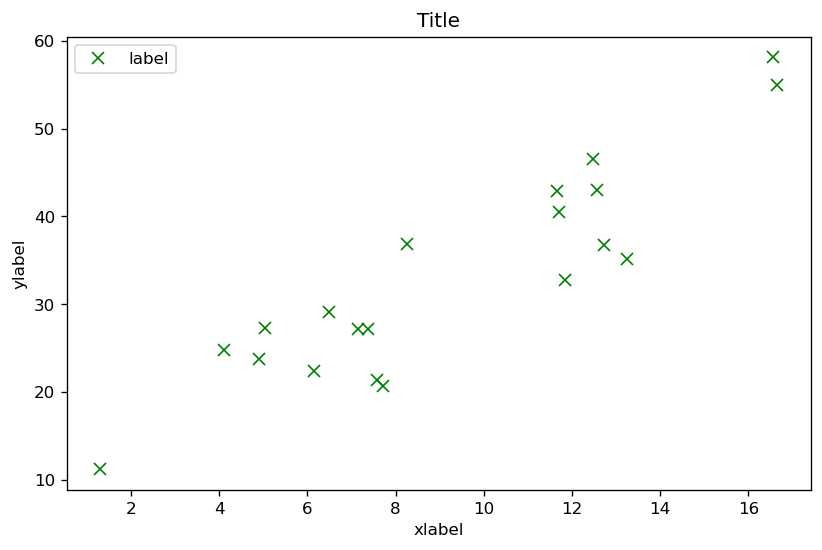

In [3]:
plt.plot(x,y,"x",color='Green',label='label')
plt.title('Title',loc='Center')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.legend()
plt.show()

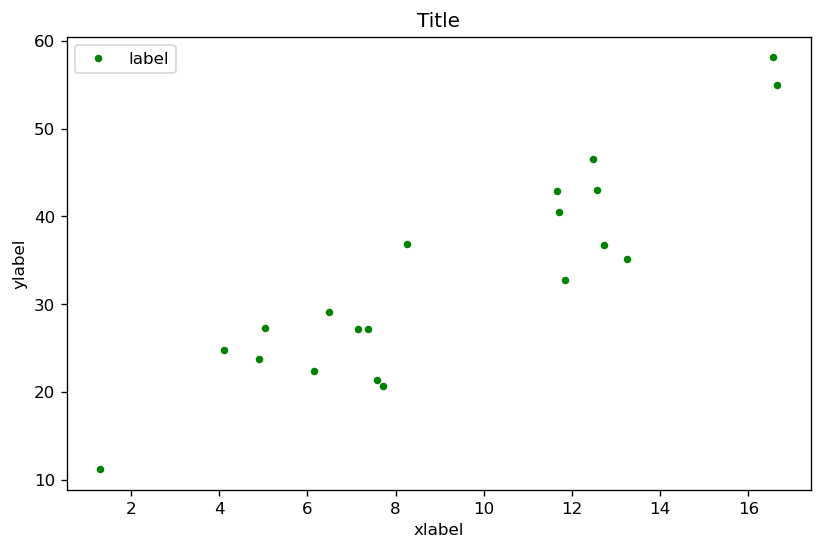

In [4]:
plt.plot(x,y,".",color='Green',label='label')
plt.title('Title',loc='Center')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.legend()
plt.show()

---

### Side note: RMSE

The root mean square error (RMSE) is a related quantity to the sum of squares 
$\left(\sum_{i=1}^n (y_i - \hat{y}_i)^2\right)$
and is defined as,

$$ \text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^n(y_i - \hat{y}_i)^2 }. $$

The RMSE is often prefered, for reporting purposes, to the sum of squares since it has a more natural interpretation, a smaller scale, and has the same units as the dependent variable. Since the RMSE involves a monotonic transformation of the SS, minimizing the RMSE is equivalent to minimizing the SS and vice versa.

---

We now conduct our first regression analysis by loading a pre-defined function that allows interacting on the plot. The aim is to find values of $\beta$ resulting in small errors between the data and fitted values. The Root Mean Squared Error (RMSE) is printed to allow a quantitative comparison of different values. The dotted lines in the figure show the errors between the data points $y_i$ and the fitted values $\hat y_i$.

### Exercise
Firstly, try manually fitting a linear function $f_\beta(x)=\beta_0+\beta_1 x$ by playing around with the regression parameters $\beta=(\beta_0,\beta_1)$ over the sliding bars under the figure. Which values $\hat\beta$ seem to be fitting well? 

In [5]:
''' Define a python function for the regression '''
def reg_line2(beta_hat_0, beta_hat_1):
    reg_line(x, y, beta_hat_0, beta_hat_1)

''' Call the interact function which is defined in the setup.py file '''
interact(reg_line2, beta_hat_0=(-20,20,0.1), beta_hat_1=(-10,10,0.1))

interactive(children=(FloatSlider(value=0.0, description='beta_hat_0', max=20.0, min=-20.0), FloatSlider(value…

<function __main__.reg_line2(beta_hat_0, beta_hat_1)>

### Exercise
Copy the code from the data plot, and amend it to include the fitted values.

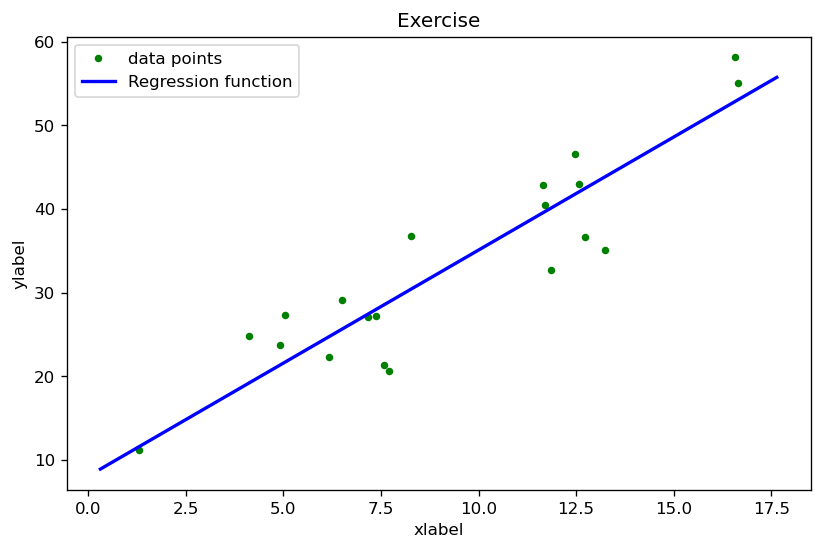

Estimated value for beta =  [8.1 2.7]


In [6]:
''' Copy the amended code from earlier, but omit the 'plt.show()' '''
plt.plot(x,y,".",color='Green',label='data points')
plt.title('Exercise',loc='Center')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.legend()
''' Input your estimates of beta from the interactive figure '''
beta_hat = np.zeros(2)  # initialise estimates
beta_hat[0] = 8.1
beta_hat[1] = 2.7

''' Plot the fitted regression function'''
x_vals = np.linspace(x.min()-1,x.max()+1,21)
y_vals = beta_hat[0]+beta_hat[1]*x_vals
plt.plot(x_vals,y_vals,"-",color='Blue',label='Regression function')

''' Show the plot '''
plt.legend()
plt.show()

print('Estimated value for beta = ',beta_hat)

---
### Exercise
We calcuate the fitted values $\hat y$ for your estimates $\hat\beta$ using $\hat y_i=\hat\beta_0+\hat\beta_1 x_i$. Using these fitted values, compute the sum of squares and the RMSE (you can check you got it right by comparing it to the RMSE computed in the plot). How do these values compare to your coursemates' ones? Would you expect the RMSE to be $0$?

In [14]:
"""
Calculation of the fitted values
"""

''' Compute the fitted values '''
y_hat = np.zeros(n)
for i in range(n):
    y_hat[i] = beta_hat[0]+beta_hat[1]*x[i]

''' Calculate the sum of squares, and the root mean squared error '''
sum_of_squares = np.dot((y_hat-y),(y_hat-y))
print('SS = ',sum_of_squares)    

# INSERT CODE to calculate and print RMSE
RMSE = np.sqrt(np.average((y_hat-y)**2))
print('RMSE', RMSE)


SS =  478.8799429618996
RMSE 4.893260380165252


---
### Exercise

Calculate the optimal $\hat\beta_{OLS}$ explicitly using ordinary least squares. 

How does the optimal $\hat\beta_{OLS}$ compare to your estimates? Compute the residual sum of squares for both the fitted values obtained using your estimates $\hat\beta$ and the fitted values from the OLS estimate $\hat\beta_{OLS}$.

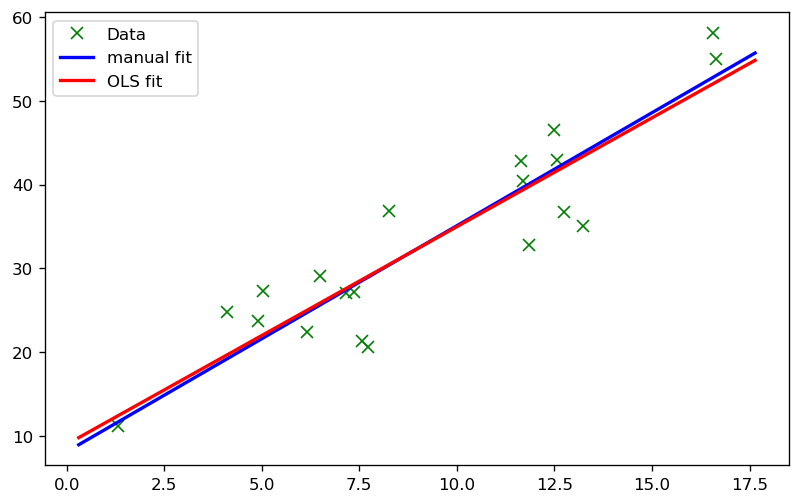

In [8]:
''' Compute the OLS parameters '''

beta_OLS = np.zeros(2)
beta_OLS[1] = np.sum(x*y - x*np.average(y))/np.sum(x*x - x*np.average(x))
beta_OLS[0] = np.average(y) - beta_OLS[1] * np.average(x)

# Plot the data points
plt.plot(x,y,"x",color='Green',label='Data')

# Plot the fitted regression function using your estimates
x_vals = np.linspace(x.min()-1,x.max()+1,21)
y_vals = beta_hat[0]+beta_hat[1]*x_vals
plt.plot(x_vals,y_vals,"-",color='Blue',label='manual fit')

# Plot the fitted regression function using the OLS estimate
x_vals = np.linspace(x.min()-1,x.max()+1,21)
y_vals = beta_OLS[0]+beta_OLS[1]*x_vals
plt.plot(x_vals,y_vals,"-",color='Red',label='OLS fit')

# Show the plot
plt.legend()
plt.show()

---

## Example 2

Now it's your turn to generate data and conduct a regression analysis. In practice, we won't have access to the true data generating function (otherwise there is no need to conduct a regression analysis!), but it is useful to understand how the true function may influence our analysis.

### Exercise
Firstly pick some parameters for $n\in\mathbb N$, $\beta\in\mathbb R^3$, and $\sigma\in\mathbb R^+$ (i.e. $\sigma>0$ and $\sigma\in\mathbb R$). The provided code will use these values to generate $n$ data points using the function `generate_noisy_observation(x)` which in turn calls the function `true_function(x)` and adds noise to the 'true' values that we would see in an idealised world. This noise is generated by the function `np.random.normal()` - multiplying it with $\sigma$ results in very little (small $\sigma$) or a lot of noise (large $\sigma$). For those familiar with random variables, the noise is drawn from a Gaussian distribution with mean $0$ and variance $\sigma^2$ (i.e. standard deviation $\sigma$), which is how noise is modelled in many applications (but not all!!).

Plot your data and add an appropriate title, legend, and axis labels to your plot.

### Question

What is the purpose of the line `np.random.seed(420)`? 

0.3156459145887941
0.3156459145887941


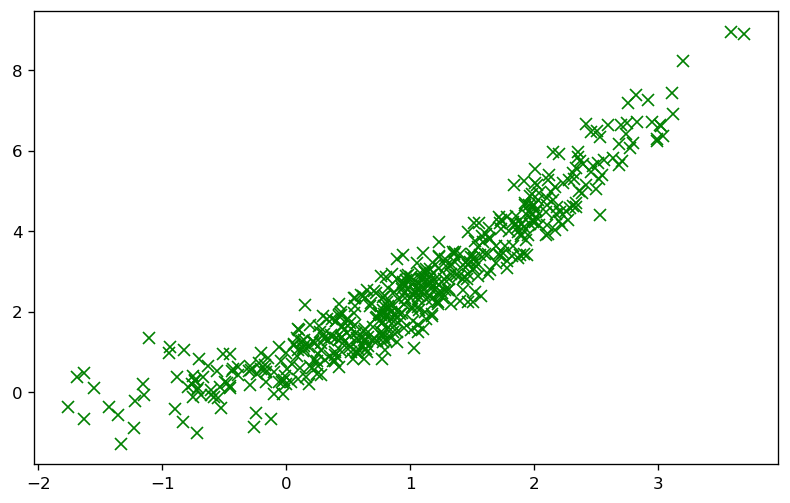

In [15]:
""" 
These are the parameters you should play around with
"""
n = 500 # Choose a value and play around with it
beta_0 = 0.8 # Choose a value and play around with it
beta_1 = 1.2 # Choose a value and play around with it
beta_2 = 0.3 # Choose a value and play around with it
sigma =  0.5 # Choose a value and play around with it



"""
These are the functions that will generate your true values and noisy observations thereof. 
The functions use whichever value the variables beta_0, beta_1, beta_2, and sigma have, they are called
_global_ variables. On the other hand, the variable f_x is only defined in the function 'true_function(x)' 
and is thus a _local_ variable, that can not be used outside the function 'true_function(x)'.
"""

''' True function that we want to estimate '''
def true_function(x):
    f_x = beta_0+beta_1*x+beta_2*(x**2)
    return f_x

''' Function that gives us noisy observations '''
def generate_noisy_observation(x):
    true_f_x = true_function(x)
    noise = sigma*np.random.normal()
    return true_f_x + noise



"""
The next few lines generate n data points which depend on your choice of the parameters above!
It makes optimization of codes easy where random numbers are used for testing. The output of the code sometime depends on input. 
So the use of random numbers for testing algorithms can be complex. Also seed function is used to generate same random numbers 
again and again and simplifies algorithm testing process.

"""
np.random.seed(420) 
print(np.random.random())
np.random.seed(420) 
print(np.random.random())

x = np.zeros(n)
Y = np.zeros(n)
for i in range(n):
    x[i] = 1+np.random.normal()  # the dependent variables x_i are simulated from a normal distribution centered at 1
    Y[i] = generate_noisy_observation(x[i]) # the independent variable is a function of x and includes some noise
    
    

"""
Plot your data
"""
plt.plot(x,Y,"x",color='Green',label='random generated data')
plt.show()

---
### Computing entry-wise squares and cubes
When working with numpy arrays, the entry-wise squares and cubes can be computed as shown in the following cell:

In [10]:
a = np.arange(5) # create the array a=[0,1,2,3,4]
a_squared = a**2 # square the array and store it as a_squared
a_cubed = a**3   # cube the array and store it as a_cubed

''' Print all arrays '''
print('a = ', a) 
print('a_squared = ', a_squared) 
print('a_cubed = ', a_cubed) 

a =  [0 1 2 3 4]
a_squared =  [ 0  1  4  9 16]
a_cubed =  [ 0  1  8 27 64]


---

### Exercise

Looking at your data, decide on an appropriate regression model$^\dagger$ and estimate the 'unknown' parameters $\beta$ using this model. Include the fitted values and the fitted regression function in the plot, and add labels for the data points, the fitted values, and the fitted regression line. Calculate the RMSE. The RMSE is minimised by the Ordinary Least Squares fit which thhe provided code computes via `beta_OLS = np.dot(np.linalg.inv(np.dot(X.transpose(),X)),np.dot(X.transpose(),Y)`. What is the mathematical expression for this? We will go over the justification for this in the next lecture, for now we just accept that this $\beta_{OLS}$ gives us a good regression fit.
$\beta_{OLS} = ((X^T)X)^{-1}\cdot(X^TY)$

Add an appropriate title, legend, and axis labels to your plot.

$^\dagger$ This will likely be either a constant, linear, quadratic, or cubic model, i.e. one of 
* $y=\beta_0$ such that we need to estimate $p=1$ parameter
* $y=\beta_0+\beta_1x$ such that we need to estimate $p=2$ parameters
* $y=\beta_0+\beta_1x+\beta_2x^2$ such that we need to estimate $p=3$ parameters
* $y=\beta_0+\beta_1x+\beta_2x^2+\beta_3x^3$ such that we need to estimate $p=4$ parameters

(4,)
[ 0.76319315  1.18415849  0.3658783  -0.02392462]
(500, 4)
y_hat (500,)
Y (500,)
(500,)
(500,)
RMSE =  0.4977864467965288


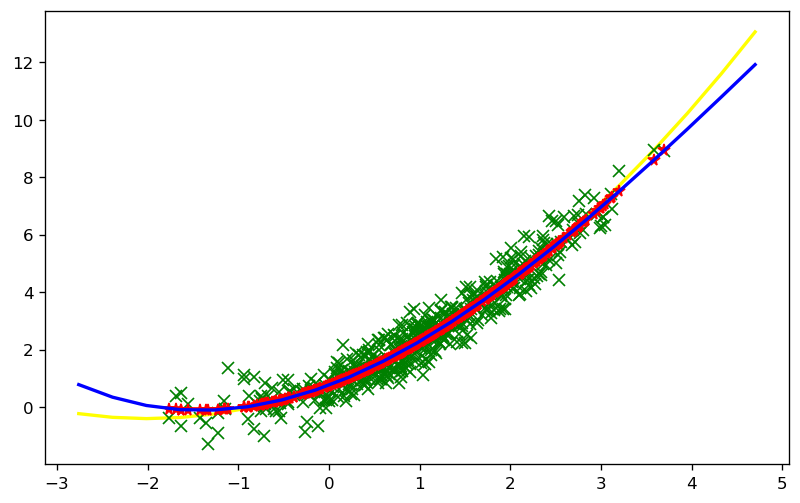

In [24]:
"""
Initialise your design matrix. The first column should be ones, the other columns should include
whatever your model requires.
"""
p = 4 # insert your choice of p


"""
The next few lines of code calculate the 'optimal' beta_OLS depending on your choice of p. Recall that the
model impacts the dimensionality of the vector beta_OLS!
"""
X = np.zeros((n,p))
if p>=1:
    X[:,0] = np.ones(n)
if p>=2:
    X[:,1] = x
if p>=3:
    X[:,2] = x**2
if p==4:
    X[:,3] = x**3
# Calculate the OLS fit for beta
beta_OLS = np.dot(np.linalg.inv(np.dot(X.transpose(),X)),np.dot(X.transpose(),Y))

print(beta_OLS.shape)
print(beta_OLS)
print(X.shape)


"""
Calculate the fitted value
"""
# y_hat = np.dot(X.transpose(),beta_OLS)
y_hat = np.dot(beta_OLS,X.transpose())

print('y_hat', y_hat.shape)
print('Y',Y.shape)
err = y_hat -Y
print(err.shape)
er = err * err
print(er.shape)


"""
Calculate and print the RMSE  
"""
RMSE = np.sqrt(np.average(er))

print('RMSE = ',RMSE)
    
    
    
"""
Plot the true regression function - this is not normally available but allows you to compare your fit 
to the true function that you are interested in :-)
""" 
x_vals = np.linspace(x.min()-1,x.max()+1,21)
plt.plot(x_vals,true_function(x_vals),"-",color='Yellow',label='True function')
    
    
    
"""
Plot the data and the regression curve
"""
# Insert code here to plot data and regression function
def reg_function(x):
    f_x = beta_OLS[0] + beta_OLS[1] * x + beta_OLS[2] * (x**2) + beta_OLS[3] * (x**3)
    return f_x


plt.plot(x,Y,"x",color='green',label='Real data')
plt.plot(x,y_hat,"*",color='red',label='regresion data')
plt.plot(x_vals,reg_function(x_vals) , "-", color='blue', label='regresion function')

### Exercise
Now play around with the parameters $n$, $\beta$, and $\sigma$, and see how the different parameters influence your analysis. Is your regression model always able to estimate the truth well? When is it easy to estimate the true parameters? When is it difficult? Does this depend on the noise ($\sigma$) and on the parameters ($\beta$)? How does it depend on the number of data points ($n$)?